Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
import scipy.io
import sys
import os

import json

from matplotlib import pyplot as plt
from pylab import hist, show, xticks, yticks
import seaborn as sns

import nltk
import spacy
from spacy.lang.en import English

import networkx as nx

#Loading Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all_news_b.xlsx to all_news_b (1).xlsx
Saving all_news_p.xlsx to all_news_p (1).xlsx


In [ ]:
all_news_b=pd.read_excel(r'all_news_b.xlsx')
all_news_p=pd.read_excel(r'all_news_p.xlsx')

In [ ]:
all_news_p['plt'] = 'pf'
for i in range (240):
  if i<=119:
    all_news_p.loc[i,'news_type'] = 'real'
  else:
    all_news_p.loc[i,'news_type'] = 'fake'

In [ ]:
all_news_p.tail()

In [ ]:
all_news_b['plt'] = 'bf'
for i in range (182):
  if i<=90:
    all_news_b.loc[i,'news_type'] = 'real'
  else:
    all_news_b.loc[i,'news_type'] = 'fake'


In [ ]:
all_news_b.tail()

In [ ]:
# Concating all Buzzfeed and Politifact
df_all_news = pd.concat([all_news_b, all_news_p])

In [ ]:
df_all_news.info()

In [ ]:
df_all_news = df_all_news [['News_id', 'news_id_', 'top_img','text','authors','keywords','meta_data','canonical_link','images','title','url','summary','movies','publish_date','plt','news_type']]
df_all_news = df_all_news.rename(columns = {'news_id_' : 'news_alph_id'})
df_all_news.tail()

## Dataframe for Title analysis

In [ ]:
df_all_news_title = df_all_news[['News_id','news_alph_id','title','text','plt','news_type']].reset_index()
df_all_news_title[180:185]

In [ ]:
df_all_news_title.describe()

# Title Processing Function

In [ ]:
def length_PTitle(title):
    
    spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
    nlp = English()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    sno = nltk.stem.SnowballStemmer('english')
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    # Removing punctuations in string
    for p in title:  
        if p in punc:  
            title = title.replace(p, "") 
    tokens = tokenizer(str(title))

    
    token_list = [] # list of token
    lemma_list = [] # list of lemmatized token

    for token in tokens:
        if token.lemma_.lower() not in spacy_stopwords:  # Removing Stop words
            token_list.append(token.text)
            lemma_list.append(token.lemma_)

    # Applying Snowball Stemmer
    tokens_sm = []
    for w in token_list:
          tokens_sm.append(sno.stem(w))

    #print("Token List: ", token_list)
    #print("Token List after Stemmarization: ", tokens_sm)
    #print("Number of Tokens: ", len(tokens_sm))

    lemmas_sm = []
    for w in lemma_list:
          lemmas_sm.append(sno.stem(w))
    #print("Lemmatized Token List: ", lemma_list)
    #print("Lemmatized Token List after Stemmarization: ", lemmas_sm)
    #print("Number of Lemmatized Tokens: ", len(lemmas_sm))
    return len(lemmas_sm)

### Example of a Title

In [ ]:
test_title = df_all_news_title.loc[12]['title']
test_length = length_PTitle(test_title)
print("Given Title: " , test_title)
print("Title Length: ", test_length)

# Title Lenght after Processing

In [ ]:
# Title_Length
for i in range (len(df_all_news_title)):
  df_all_news_title.loc[i,'pros_title_length'] = length_PTitle(df_all_news_title.loc[i]['title'])
df_all_news_title[180:185]

,index,News_id,news_alph_id,title,text,plt,news_type,pros_title_length
180,180,181,BuzzFeed_Fake_181,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,bf,fake,5.0
181,181,182,BuzzFeed_Fake_182,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,bf,fake,7.0
182,0,1,PolitiFact_Real_1,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,pf,real,8.0
183,1,2,PolitiFact_Real_2,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,pf,real,9.0
184,2,3,PolitiFact_Real_3,House oversight panel votes Clinton IT chief i...,Story highlights The House Oversight panel vot...,pf,real,7.0


In [ ]:
b = pd.DataFrame(df_all_news_title[['pros_title_length','news_type','title']].groupby(['pros_title_length','news_type']).describe())
b

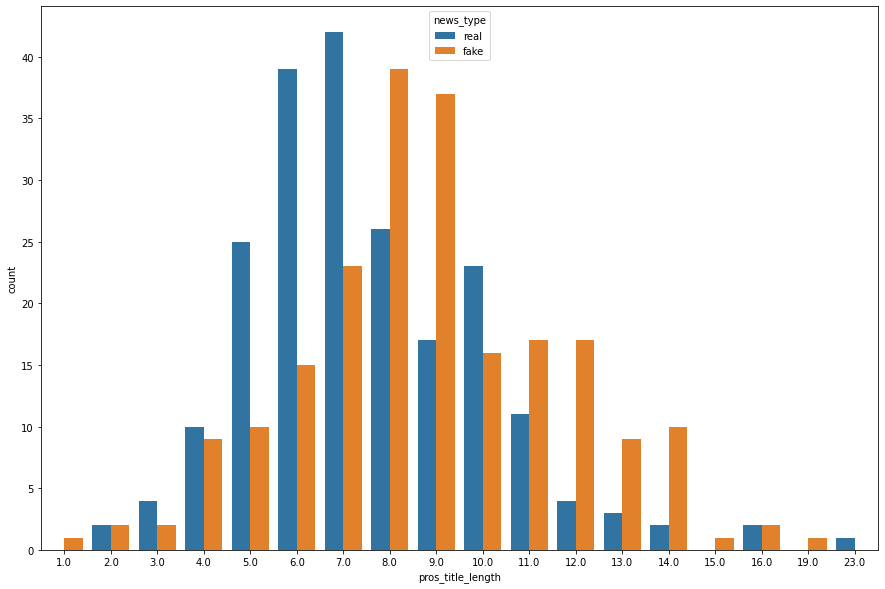

In [ ]:
plt.figure(figsize=(15,10))
bx = sns.countplot(x="pros_title_length", hue="news_type", data=df_all_news_title)


# Adding Processeed_Title_Length feature to the main DataFrame

In [ ]:
result = pd.merge(df_all_news, df_all_news_title, how='outer', on=['news_alph_id'])
result

,News_id_x,news_alph_id,top_img,text_x,authors,keywords,meta_data,canonical_link,images,title_x,url,summary,movies,publish_date,plt_x,news_type_x,pros_title_length_x,index,News_id_y,title_y,text_y,plt_y,news_type_y,pros_title_length_y
0,1,BuzzFeed_Real_1,http://eaglerising.com/wp-content/uploads/2016...,"On Saturday, September 17 at 8:30 pm EST, an e...","['View All Posts', 'Leonora Cravotta']",[],{'description': '“We believe at this point in ...,http://eaglerising.com/36942/another-terrorist...,['http://constitution.com/wp-content/uploads/2...,Another Terrorist Attack in NYC…Why Are we STI...,http://eaglerising.com/36942/another-terrorist...,NaN,[],{'$date': 1474528230000},bf,real,24.0,0,1,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",bf,real,9.0
1,2,BuzzFeed_Real_2,http://a.abcnews.com/images/Politics/AP_donald...,Less than a day after protests over the police...,"['More Candace', 'Adam Kelsey', 'Abc News', 'M...",[],"{'fb_title': ""Trump: Drugs a 'Very, Very Big F...",http://abcnews.go.com/Politics/donald-trump-dr...,['http://www.googleadservices.com/pagead/conve...,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",http://abcn.ws/2d4lNn9,NaN,[],NaN,bf,real,30.0,1,2,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,bf,real,7.0
2,3,BuzzFeed_Real_3,http://rightwingnews.com/wp-content/uploads/20...,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...",['Cassy Fiano'],[],"{'googlebot': 'noimageindex', 'og': {'site_nam...",http://rightwingnews.com/barack-obama/obama-un...,['http://rightwingnews.com/wp-content/uploads/...,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,NaN,['https://www.youtube.com/embed/ji6pl5Vwrvk'],{'$date': 1474476044000},bf,real,29.0,2,3,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",bf,real,11.0
3,4,BuzzFeed_Real_4,http://static.politico.com/e9/11/6144cdc24e319...,Getty Images Wealth Of Nations Trump vs. Clint...,"['Jack Shafer', 'Erick Trickey', 'Zachary Kara...",[],{'description': 'He sees it as zero-sum. She b...,http://www.politico.com/magazine/story/2016/09...,['https://static.politico.com/dims4/default/8a...,Trump vs. Clinton: A Fundamental Clash over Ho...,http://politi.co/2de2qs0,NaN,[],{'$date': 1474974420000},bf,real,26.0,3,4,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,bf,real,7.0
4,5,BuzzFeed_Real_5,http://a.abcnews.com/images/US/AP_Obama_BM_201...,President Obama today vetoed a bill that would...,"['John Parkinson', 'More John', 'Abc News', 'M...",[],{'fb_title': 'President Obama Vetoes 9/11 Vict...,http://abcnews.go.com/Politics/president-obama...,['http://www.googleadservices.com/pagead/conve...,"President Obama Vetoes 9/11 Victims Bill, Sett...",http://abcn.ws/2dh2NFs,NaN,[],NaN,bf,real,25.0,4,5,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,bf,real,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,236,PolitiFact_Fake_236,https://teddystick.com/wp-content/uploads/2017...,Maxine Waters (D-CA) is one of the most unplea...,[],[],"{'generator': 'WordPress 4.8', 'og': {'site_na...",https://teddystick.com/democrat-maxine-waters-...,['https://teddystick.com/wp-content/uploads/20...,Democrat Maxine Waters Has Shown Up To Only 10...,https://teddystick.com/democrat-maxine-waters-...,NaN,['https://www.youtube.com/embed/nRL-jeemo08?fe...,{'$date': 1496856673000},pf,fake,9.0,235,236,Democrat Maxine Waters Has Shown Up To Only 10...,Maxine Waters (D-CA) is one of the most unplea...,pf,fake,9.0
418,237,PolitiFact_Fake_237,http://londonwebnews.com/wp-content/uploads/20...,"Kellyanne Conway, counselor to President Trump...",[],[],"{'description': 'Kellyanne Conway, counselor t...",http://londonwebnews.com/2017/06/01/liberal-wo...